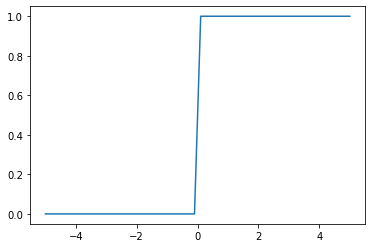

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#입력값 x가 0이하면 0, 0보다 크면 1
def step_function(x):
    return np.where(x<=0, 0, 1)

#개수 지정하지 않으면 50개
x = np.linspace(-5, 5)
y = step_function(x)

plt.plot(x, y)
plt.show()

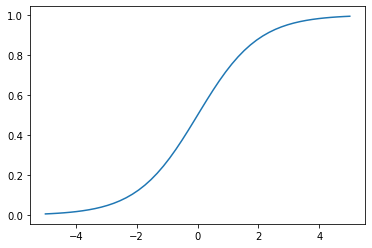

In [6]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5)
y = sigmoid_function(x)

plt.plot(x, y)
plt.show()

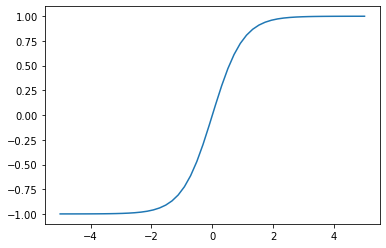

In [8]:
def tanh_function(x):
    #return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    return np.tanh(x)

x = np.linspace(-5, 5)
y = tanh_function(x)

plt.plot(x, y)
plt.show()

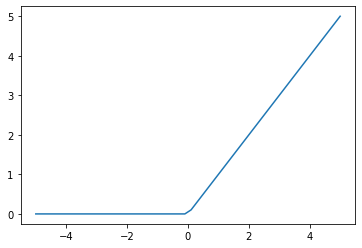

In [9]:
def relu_function(x):
    #x <= 0이면 0이고, x > 0이면 x
    return np.where(x <= 0, 0, x)

x = np.linspace(-5, 5)
y = relu_function(x)

plt.plot(x, y)
plt.show()

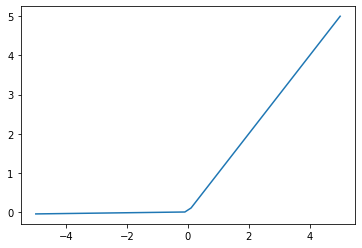

In [10]:
def leaky_relu_function(x):
    #x <= 0이면 0이고, x > 0이면 x
    return np.where(x <= 0, 0.01*x, x)

x = np.linspace(-5, 5)
y = leaky_relu_function(x)

plt.plot(x, y)
plt.show()

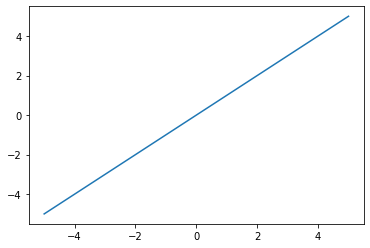

In [11]:
#항등 함수
#신경망의 출력 층에서 항등 함수나 소프트맥스 함수를 자주 사용
#연속적인 수치를 예측하는 회귀 문제를 다룰 때 적합
x = np.linspace(-5, 5)
y = x

plt.plot(x, y)
plt.show()

In [13]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

x = np.array([1, 2, 3])
y = softmax_function(x)

#모든 원소값은 0~1의 범위에 있으며, 원소값의 합은 1
print(y)
print(sum(y))

[0.09003057 0.24472847 0.66524096]
1.0


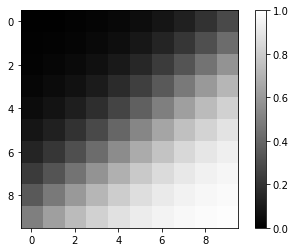

In [14]:
#단일 뉴런 규현
#-1.0부터 1.0미만, 0.2 간격
#뉴런으로 들어오는 입력이 x, y 2개
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

#출력 값을 저장할 그리드
Z = np.zeros((10, 10))

#각 입력 값에 대한 가중치(입력 값에 대한 영향력, 0인 경우 영향력이 없으며, 음수인 경우 영향력이 반대로 작용)
w_x = 2.5
w_y = 3.0

#편향(편향 값이 높을 수록 뉴런은 쉽게 흥분하게 됨)
bias = 0.1

for i, x in enumerate(X):
    for j, y in enumerate(Y):
        #입력과 가중치 곱의 합 + 편향
        u = x*w_x + y*w_y + bias
        
        #그리드 맵에 출력값 저장
        #활성화 함수 - 시그모이드 함수
        _y = 1 / (1 + np.exp(-u))
        Z[j][i] = _y
        
plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()
#결과 값에서 검은색(0)은 뉴련이 흥분하지 않은 상태, 흰색(1)은 뉴련이 흥분한 상태

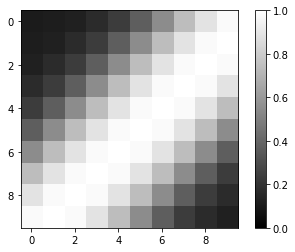

In [15]:
#3층 신경망 네트워크
#%matplolib inline

#입력 x, y값
X = np.arange(-1.0, 1.0, 0.2) #원소 10개씩
Y = np.arange(-1.0, 1.0, 0.2)

#출력을 저장할 10x10 그리드
Z = np.zeros((10, 10))

#은닉층 가중치 2x2
#입력층의 뉴런 수 2, 은닉층 뉴런 수 2 -> 2 x 2 = 4개의 가중치
w_im = np.array([[4.0, 4.0],
                [4.0, 4.0]])
#출력층 가중치 2x1
#은닉층 뉴런 수 2, 출력층 뉴런 수 1 -> 2 x 1 = 2개의 가중치
w_mo = np.array([[1.0],
                [-1.0]])

#편향 개수는 뉴런 수와 동일
#은닉층 편향
b_im = np.array([3.0, -3.0])
#출력층 편향
b_mo = np.array([0.1])

#입력값, 가중치, 편향
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    #활성화 함수 - 시그모이드
    return 1 / (1 + np.exp(-u))

def output_layer(x, w, b):
    u = np.dot(x, w) + b #항등 함수
    return u

#그리드맵의 각 그리드별 신경망 연산
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        #순전파
        
        #입력층
        inp = np. array([x, y])
        #은닉층
        mid = middle_layer(inp, w_im, b_im)
        #출력층
        out = output_layer(mid, w_mo, b_mo)
        
        #출력층의 뉴런이 1개 이므로 출력값은 1개
        Z[j][i] = out[0]

plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

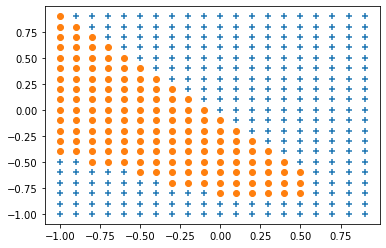

In [18]:
#3층 신경망 네트워크(분류)
#%matplolib inline

#입력 x, y값
X = np.arange(-1.0, 1.0, 0.1) #원소 20개씩
Y = np.arange(-1.0, 1.0, 0.1)

#은닉층 가중치 2x2
#입력층의 뉴런 수 2, 은닉층 뉴런 수 2 -> 2 x 2 = 4개의 가중치
w_im = np.array([[1.0, 2.0],
                [2.0, 3.0]])
#출력층 가중치 2x2
#은닉층 뉴런 수 2, 출력층 뉴런 수 2 -> 2 x 2 = 4개의 가중치
w_mo = np.array([[-1.0, 1.0],
                [1.0, -1.0]])

#편향 개수는 뉴런 수와 동일
#은닉층 편향
b_im = np.array([0.3, -0.3])
#출력층 편향
b_mo = np.array([0.4, 0.1])

#입력값, 가중치, 편향
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    #활성화 함수 - 시그모이드
    return 1 / (1 + np.exp(-u))

def output_layer(x, w, b):
    u = np.dot(x, w) + b #소프트맥스
    return np.exp(u) / np.sum(np.exp(u))

#분류 결과를 저장할 리스트
x_1 = []
y_1 = []
x_2 = []
y_2 = []

#그리드맵의 각 그리드별 신경망 연산
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        #순전파
        
        #입력층
        inp = np. array([x, y])
        #은닉층
        mid = middle_layer(inp, w_im, b_im)
        #출력층
        out = output_layer(mid, w_mo, b_mo)
        
        #확률의 크기를 비교해 분류
        if out[0] > out[1]:
            x_1.append(x)
            y_1.append(y)
        else:
            x_2.append(x)
            y_2.append(y)

#산포도 표시
plt.scatter(x_1, y_1, marker="+")
plt.scatter(x_2, y_2, marker="o")
plt.show()